# Limpiando el dataset: netflix_titles.csv

In [70]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [4]:
# Abrir y leer el csv netflix_titles.csv
df=pd.read_csv('netflix_titles.csv')

In [6]:
#Mostrarlo para ver que todo va bien
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [8]:
#Vamos a ver las dimensiones de la tabla: netflix_titles.csv
df.shape

(8807, 12)

In [10]:
# Veamos los tipos de datos de los registros, además de cuantos hay por columna
#Esto es importante por que aquí nos comenzamos a dar una idea de que tal está el llenado de información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [12]:
#Vamos a revisar cuántos registros nos hacen falta,y el porcentaje que esto representa
#Esto de aquí es importante por que cuándo manejamos cantidades de datos grandes,
#es normal que existan errores de dedo o de llenado, pero si conforman máximo un 20% de los datos, tenemos entre manos un 
#problema
print(f"Número de registros faltantes: {df.isnull().sum().sum()},Porcentaje:{df.isnull().sum().sum()/len(df)*100}")

Número de registros faltantes: 4307,Porcentaje:48.904280685818094


In [18]:
# Conteo de los niveles en las diferentes columnas: ver cuáles son los niveles de registros que existen, además de sus tipos de datos
#Numéricos
cols_num=df._get_numeric_data().columns
cols_num

Index(['release_year'], dtype='object')

In [20]:
#Tipo objeto, conteo al igual
cols_obj=df.select_dtypes(include=['object']).columns
cols_obj


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [24]:
#Conocer los niveles existentes en los tipo objeto
for col in cols_obj:
    print(f"'{col}':Tiene: {df[col].nunique()} Niveles que existen")
    print(df[col].unique())
    print("")

'show_id':Tiene: 8807 Niveles que existen
['s1' 's2' 's3' ... 's8805' 's8806' 's8807']

'type':Tiene: 2 Niveles que existen
['Movie' 'TV Show']

'title':Tiene: 8807 Niveles que existen
['Dick Johnson Is Dead' 'Blood & Water' 'Ganglands' ... 'Zombieland'
 'Zoom' 'Zubaan']

'director':Tiene: 4528 Niveles que existen
['Kirsten Johnson' nan 'Julien Leclercq' ... 'Majid Al Ansari'
 'Peter Hewitt' 'Mozez Singh']

'cast':Tiene: 7692 Niveles que existen
[nan
 'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng'
 'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera'
 ...
 'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill

In [26]:
#Generar el resumen numérico de las columnas tipo numero 
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [32]:
#Conocer las filas duplicadas en el dataFrame, el sum da el informe sumado
df.duplicated().sum()

0

In [34]:
#Da 0, pero igual pongo el código por si hubieran más e incluirlo
#Elimnar las filas duplicadas
#Conocer cómo es su tamaño sin eliminar
print(f"Tamaño del set de datos antes de eliminar las filas repetidas:{df.shape}")

Tamaño del set de datos antes de eliminar las filas repetidas:(8807, 12)


In [36]:
#Ahora si, simulamos borrar los repetido 
df.drop_duplicates(inplace=True)
print(f"Tamaño del set de datos después de eliminar las filas repetidas:{df.shape}")

Tamaño del set de datos después de eliminar las filas repetidas:(8807, 12)


In [38]:
#Ahora vamos a analizar los rangos de los datos con diagramas de caja y bigote
# Comenzando por datos tipo num
#Mostrando en dónde vamos a trabajar
cols_num

Index(['release_year'], dtype='object')

Text(0.5, 1.0, 'release_year')

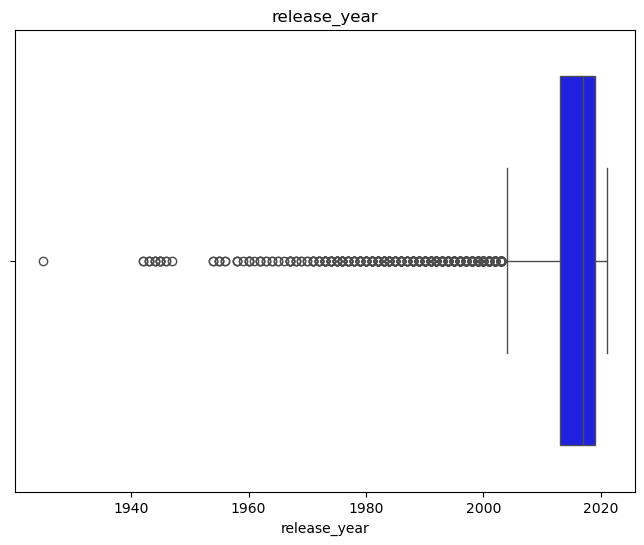

In [52]:
#Es solo una columna, ni modo. Seguimos
#Arreglo por que solo hay una columna
fig, ax = plt.subplots(figsize=(8, 6))  
sns.boxplot(x=cols_num[0], data=df, ax=ax, color='blue')  # usando la única columna
ax.set_title(cols_num[0])

In [60]:
#Mostrar la columna de años de publicación menor a 1960, suena razonable
df_filtrado = df[df['release_year'] < 1960]
print(df_filtrado)

     show_id     type                                             title  \
542     s543    Movie                                             Ujala   
1331   s1332  TV Show               Five Came Back: The Reference Films   
1699   s1700    Movie                                   White Christmas   
2368   s2369    Movie                                     Cairo Station   
2369   s2370    Movie                                       Dark Waters   
2375   s2376    Movie                                   The Blazing Sun   
4250   s4251  TV Show                 Pioneers: First Women Filmmakers*   
6431   s6432    Movie                             Cat on a Hot Tin Roof   
6784   s6785    Movie                                  Forbidden Planet   
6853   s6854    Movie                                              Gigi   
7219   s7220    Movie                           Know Your Enemy - Japan   
7294   s7295    Movie                                Let There Be Light   
7575   s7576    Movie    

In [62]:
# Eliminar filas con "release_year"<1960
#Antes
print(f"Tamaño del set, antes de eliminar registros por 'release_year':{df.shape}")

Tamaño del set, antes de eliminar registros por 'release_year':(8807, 12)


In [66]:
#después
df=df[df['release_year']<1960]
print(f"Tamaño del set, después de eliminar registros por 'release_year':{df.shape}")

Tamaño del set, después de eliminar registros por 'release_year':(27, 12)


C:\Users\Administrador\AppData\Local\Temp\ipykernel_13552\3503385820.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=df, ax=ax[i],palette='pastel')
C:\Users\Administrador\AppData\Local\Temp\ipykernel_13552\3503385820.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30, size=6)


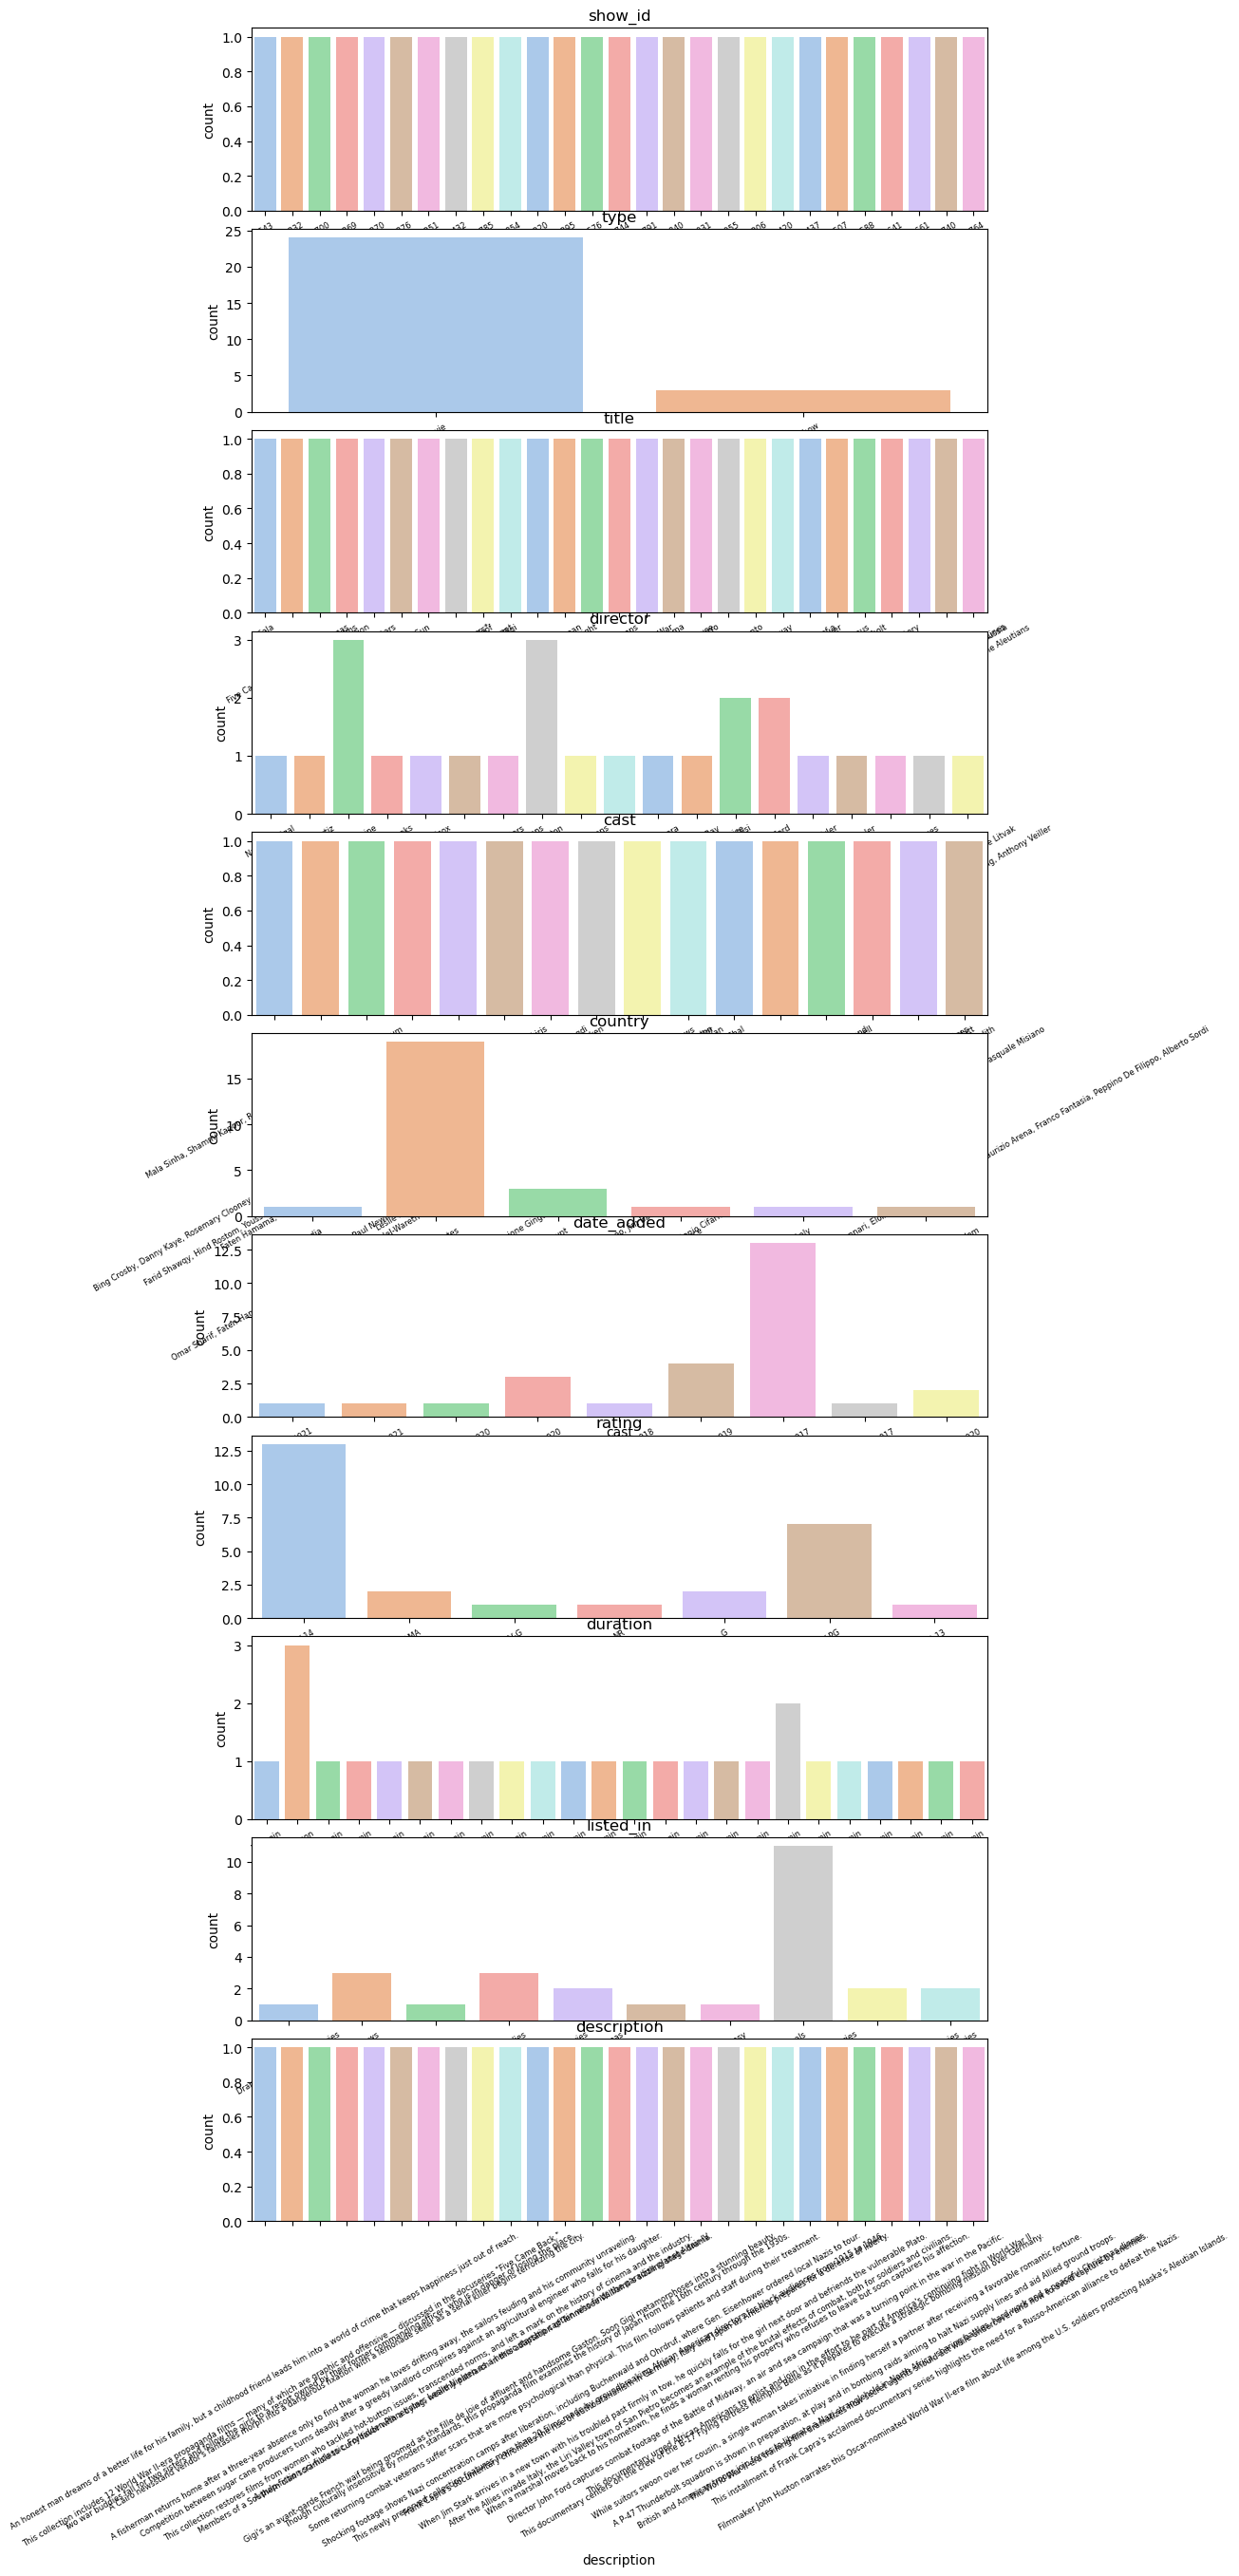

In [72]:
# Graficar los subniveles de cada variable tipo obj
cols_obj
fig, ax=plt.subplots(nrows=len(cols_cat),ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=0.1)

for i,col in enumerate(cols_obj):
    sns.countplot(x=col,data=df, ax=ax[i],palette='pastel')
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30, size=6)
    warnings.filterwarnings('ignore')

In [84]:
#Los datos tienden a ser grandes y con palabras o frases complejas: cómo podrán obeservar en todo el trabajo, hay solo una
#varible numérica, e incluso campos de sinopsis, así que vamos a unificar un par de campos de una columna fácil, y hacer el código 
#no tan complejo
# primSeg: unificar movie y tv show
print(df['type'].unique(),"Niveles: ",df['type'].nunique())
#Si esto se ve raro es por que tuve un error de dedo, la linea original se veía así
#df['type']=df['type'].str.replace('Movie','TV Show')
df['type']=df['type'].str.replace('TV Sshow','TV Show')
print("")
print(df['type'].unique(),"Niveles: ",df['type'].nunique())


['TV Sshow' 'TV Show'] Niveles:  2

['TV Sshow' 'TV Show'] Niveles:  2
